# 1. Import required libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

In [3]:
import zipfile, requests, io
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open("SMSSpamCollection"), sep='\t', names=["label", "message"])

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# 3. Preprocess the text

## 3.1 Convert labels: ham=0, spam=1

In [4]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [5]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## 3.2 TF-IDF Vectorization

In [6]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
X = tfidf.fit_transform(df['message'])
y = df['label_num']

# 4. Split the dataset (80-20 split)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train the model

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 6. Evaluate the model

In [9]:
y_pred = model.predict(X_test)

print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Evaluation Metrics ---
Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# Confusion Matrix


In [10]:
cm = confusion_matrix(y_test, y_pred)

In [11]:
cm

array([[966,   0],
       [ 33, 116]])

# 7. Perform 5-fold cross-validation

In [12]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n5-Fold Cross Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


5-Fold Cross Validation Accuracy: [0.97847534 0.96681614 0.96319569 0.97127469 0.97217235]
Mean CV Accuracy: 0.970386841745095



# 8. Visualize results

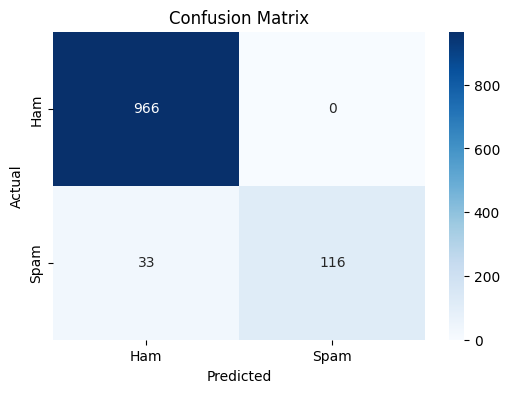

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()